In [1]:
import timeit
import functools

import torch
from torch import nn
import matplotlib.pyplot as plt

## Image

In [2]:
WIDTH = 1280
HEIGHT = 720
CHANNELS = 3

In [3]:
image = torch.rand(CHANNELS, HEIGHT, WIDTH)

## Basic Conv2D

In [4]:
def conv(out_channels, kernel_size):
  net = nn.Conv2d(
    in_channels=CHANNELS,
    out_channels=out_channels,
    kernel_size=kernel_size
  )
  return net(image)

n_channels: 1,  3.05 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 2,  2.87 ms ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 3,  3.11 ms ± 63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 4,  3.24 ms ± 100 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 5,  3.39 ms ± 83.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 6,  3.43 ms ± 59 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 7,  3.52 ms ± 43.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 8,  2.47 ms ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 9,  7.09 ms ± 70.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 10,  8.51 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 11,  9.19 ms ± 83.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_channels: 12,  9.54 ms ± 105 µs per

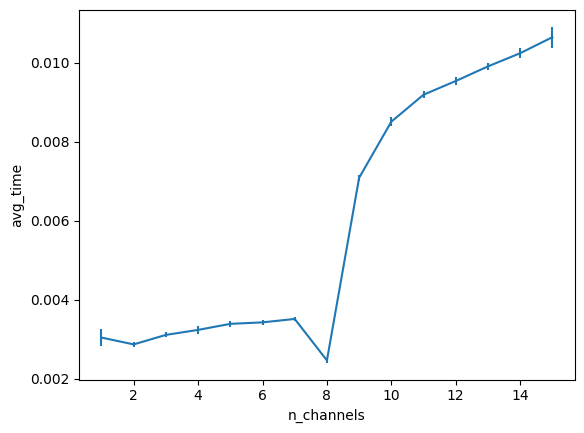

In [5]:
# out_channels scaling
out_channels = [i for i in range(1, 16)]
times_avg = []
times_std = []
for out_chan in out_channels:
  func = functools.partial(conv, out_chan, 3)
  time = %timeit -o -q func() 
  print(f"n_channels: {out_chan}, ", time)
  times_avg.append(time.average)
  times_std.append(time.stdev)

plt.errorbar(x=out_channels, y=times_avg, yerr=times_std)
plt.ylabel("avg_time, seconds")
plt.xlabel("n_channels")
plt.show()

kernel_size: 1,  2.91 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 2,  1.3 ms ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
kernel_size: 3,  3.02 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 4,  2.94 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 5,  4.24 ms ± 57 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 6,  5.88 ms ± 77.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 7,  8.42 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 8,  9.63 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 9,  11.6 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 10,  14.5 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 11,  18.3 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
kernel_size: 12,  19.5 ms ± 

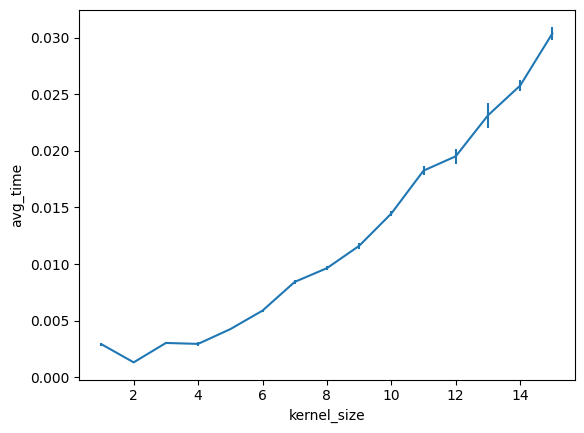

In [6]:
# kernel_size scaling
kernel_sizes = [i for i in range(1, 16)]
times_avg = []
times_std = []
for kernel_size in kernel_sizes:
  func = functools.partial(conv, 3, kernel_size)
  time = %timeit -o -q func() 
  print(f"kernel_size: {kernel_size}, ", time)
  times_avg.append(time.average)
  times_std.append(time.stdev)

plt.errorbar(x=kernel_sizes, y=times_avg, yerr=times_std)
plt.ylabel("avg_time, seconds")
plt.xlabel("kernel_size")
plt.show()